## Mass completeness limit

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from astropy.table import Table
from scipy import optimize, interpolate
import tqdm

In [2]:
bgs = Table.read('../data/BGS_ANY_full.provabgs.hdf5')

In [3]:
bgs = bgs[bgs['is_bgs_bright']]
bgs[:5]

TARGETID,RA,DEC,Z_HP,ZERR,TSNR2_BGS,MAG_G,MAG_R,MAG_Z,MAG_W1,FIBMAG_R,HPIX_64,provabgs_mcmc,provabgs_theta_bf,provabgs_z_max,provabgs_logMstar_bf,provabgs_logMstar,SCHLEGEL_COLOR,provabgs_w_zfail,provabgs_w_fibassign,is_bgs_bright,is_bgs_faint,col22
int64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,int64,"float64[100,13]",float64[13],float64,float64,float64[100],float64,float64,float64,bool,bool,bytes16
39633390185480938,191.14757099005186,60.345815959235,0.2819459922463374,2.191690764397e-05,1361.7778,20.420939956138607,19.440977833152942,18.807486906915823,18.725561063547207,21.083244145949642,11226,11.091623656909688 .. 0.3684622521221414,11.14249424405227 .. 0.3651476796540595,0.2891440449335749,10.894820213317871,10.848259925842285 .. 10.952618598937988,0.1059712957858181,1.0671457830611217,3.0714285714285716,True,False,provabgs_w_zfail
39633416324383107,187.05117249536465,62.614542270156655,0.2703579310142208,0.00018002802349298926,1218.0295,20.876585604498494,19.373871860075226,18.567397256862876,18.32574859422363,20.212708263179056,11251,11.127879812361321 .. 0.6691898790548064,11.16028636319183 .. 0.6710591095679554,0.2822033708476234,10.909546852111816,10.877055168151855 .. 10.874772071838379,-0.3616078306686752,1.005530547154544,1.0,True,False,provabgs_w_zfail
39633393155049303,187.83760708675698,60.38987543677365,0.1731108191825362,2.1990725452772437e-05,1234.5317,19.69273753706838,18.892550253715136,18.34277957526595,18.565848448993197,21.00700131929247,11237,10.462320138967206 .. 0.2729800106294297,10.502975152735333 .. 0.2744993206027024,0.21924790414805623,10.27071762084961,10.239782333374023 .. 10.281316757202148,0.01670638624886256,1.0556176146427896,1.8169014084507042,True,False,provabgs_w_zfail
39633390164510257,188.7298325265811,60.181046704454054,0.2854181586411897,8.005616412868143e-06,1080.5574,20.021376563811977,19.091834839420468,18.488285412624066,18.38746082854565,20.641812033703985,11237,11.113035968148562 .. 0.3947223033620342,11.257075728183183 .. 0.3983021711356034,0.32988420863892076,11.017786979675293,10.893733024597168 .. 11.032293319702148,0.18537451480860634,1.0209118095758252,3.6857142857142855,True,False,provabgs_w_zfail
39633396124617897,187.04622815471808,60.82670180284912,0.37400455377945924,7.204306804440984e-05,1230.1184,20.981597394532177,19.43493695012083,18.528152481985934,17.661754869208693,20.920672799869905,11237,11.576280755647756 .. 0.3713771184202182,11.529095176742617 .. 0.3710937098062413,0.38290726050663504,11.287631034851074,11.330133438110352 .. 11.413797378540039,0.21040507948362408,1.0446527216195594,1.0,True,False,provabgs_w_zfail


In [4]:
mask = (bgs['Z_HP'] > 0.) & (bgs['MAG_R'] > 0.) & (bgs['provabgs_logMstar_bf'] > 0.)

In [5]:
z = bgs['Z_HP'][mask]
x = bgs['provabgs_logMstar_bf'][mask]
mag_r = bgs['MAG_R'][mask]

In [6]:
logmstar_limit_bright = x + 0.4*(mag_r - 19.5)

In [7]:
faintest_20p = np.percentile(mag_r,20)
faintest_20p_mask = mag_r<faintest_20p

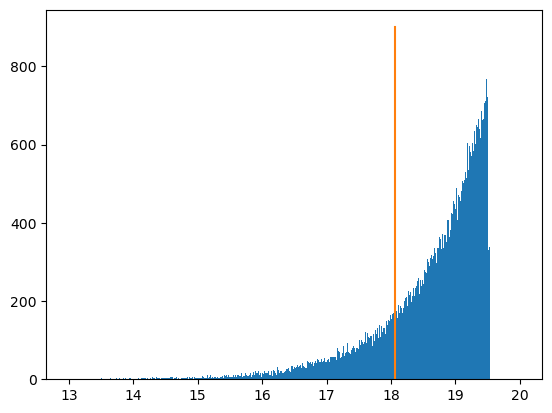

In [8]:
plt.hist(mag_r, range=(13,20), bins=1400)
plt.plot(np.repeat(faintest_20p, 10), np.linspace(0, 900, 10))

In [21]:
z_bins = np.arange(0,0.3, 0.0025)
z_limit = np.zeros((len(z_bins)-1))
mass_limit_bright = np.zeros((len(z_bins)-1))

In [22]:
for i in range(len(z_bins)-1):
    mask = (z>z_bins[i]) & (z<=z_bins[i+1]) & faintest_20p_mask
    z_limit[i] = np.nanpercentile(z[mask], 90)
    mass_limit_bright[i] = np.nanpercentile(logmstar_limit_bright[mask], 90)

In [37]:
mass_limit_bright_function = interpolate.interp1d(z_limit,mass_limit_bright, fill_value='extrapolate')

In [38]:
line = np.linspace(0.0,0.3, 100)

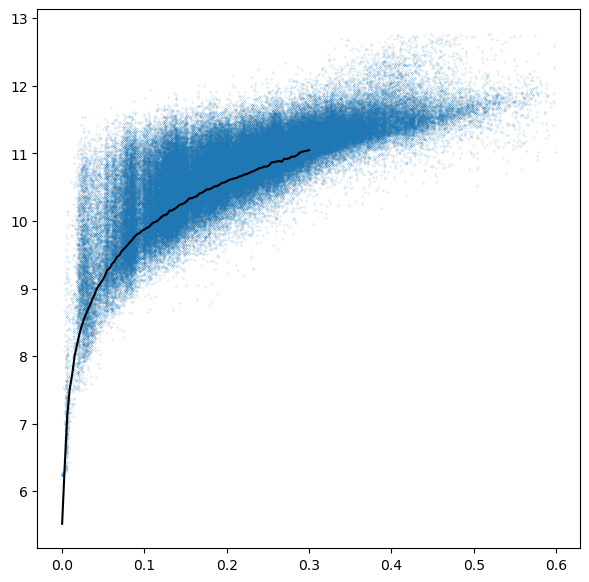

In [39]:
plt.figure(figsize=(7,7))
plt.plot(z, x, 'o', markersize=0.1)
plt.plot(line, mass_limit_bright_function(line), color='k')
# plt.plot(z_bins[:-1], mass_limit_bright, 'o')
# plt.plot(np.repeat(0.01, 10), np.linspace(6,13, 10))

In [40]:
z_limit

array([0.00247985, 0.00483082, 0.00656047, 0.0090045 , 0.01228954,
       0.01468146, 0.01739703, 0.01982065, 0.02223816, 0.02478942,
       0.02718216, 0.0297723 , 0.03214576, 0.03475644, 0.03725439,
       0.03969578, 0.04231814, 0.04471862, 0.04726608, 0.04971804,
       0.05217666, 0.05485575, 0.05714361, 0.05983116, 0.0622433 ,
       0.06477037, 0.06729212, 0.0696601 , 0.07221736, 0.07470074,
       0.07726848, 0.07970581, 0.08235858, 0.08472435, 0.08723007,
       0.08963203, 0.09228077, 0.09477242, 0.09729331, 0.099802  ,
       0.10227854, 0.10469317, 0.10715788, 0.10972896, 0.11231016,
       0.11474048, 0.11718   , 0.11978621, 0.12227634, 0.12479607,
       0.12729936, 0.12974797, 0.13225808, 0.13471149, 0.13727515,
       0.13970204, 0.14227686, 0.14457675, 0.14727102, 0.14978783,
       0.15221812, 0.15465339, 0.15732456, 0.15978838, 0.1621385 ,
       0.16474496, 0.16723761, 0.16974835, 0.17225687, 0.17476975,
       0.17729319, 0.17983345, 0.18223385, 0.18479195, 0.18722

In [41]:
mass_limit_bright

array([ 6.19233606,  6.83089859,  7.19541283,  7.49541767,  7.73446394,
        7.97573148,  8.1206893 ,  8.28289916,  8.38297483,  8.4857448 ,
        8.5662122 ,  8.65428108,  8.68919015,  8.79760012,  8.85287516,
        8.91898337,  9.00431108,  9.04462424,  9.09902614,  9.12211824,
        9.19599217,  9.27656627,  9.28617265,  9.35747078,  9.38232742,
        9.42622197,  9.48121354,  9.49533128,  9.55465837,  9.58076478,
        9.61429673,  9.64659735,  9.68782778,  9.7159304 ,  9.75738293,
        9.79091068,  9.81607921,  9.82226304,  9.85758522,  9.87375352,
        9.8906075 ,  9.90740924,  9.9281017 ,  9.97121565,  9.98271625,
        9.99167673, 10.01813817, 10.04717844, 10.07974563, 10.09122367,
       10.09460286, 10.1539076 , 10.14871284, 10.16391119, 10.18545648,
       10.20465581, 10.23759639, 10.24537951, 10.25409408, 10.27692096,
       10.30349627, 10.3382326 , 10.33327252, 10.35523964, 10.35273232,
       10.37603491, 10.41671427, 10.41610546, 10.43212978, 10.47

In [43]:
alpha2 = -1.48

In [51]:
np.repeat(alpha2 , 10)[:,None] + 1

array([[-0.48],
       [-0.48],
       [-0.48],
       [-0.48],
       [-0.48],
       [-0.48],
       [-0.48],
       [-0.48],
       [-0.48],
       [-0.48]])

In [ ]:
bin_mask = (z > 0.4) & (z < 0.405) & faintest_20p_mask

In [ ]:
plt.hist(logmstar_limit_bright[bin_mask], range=(13,20), bins=1400)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(z, mag_r, 'o', markersize=0.1)
plt.plot(line, np.repeat(faintest_20p, len(line)))

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x, mag_r, 'o', markersize=0.1)

In [ ]:
mag_r.max()